In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\dataAnalest\python_project\project 1 - Sales_Data/all_months.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### data cleaning

#### null values

In [4]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df = df.reset_index()

In [8]:
df.dtypes

index                int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### create month column

In [9]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
df['Month'] = df['Order Date'].str[0:2]

#### cleane month with value = 'Or'

In [11]:
d_or = df[df['Month'] == 'Or']

In [12]:
df.drop(d_or.index,inplace = True)

#### convert type of data in month columns to numeric

In [13]:
df['Month'] = pd.to_numeric(df['Month'])

In [14]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### create sales columns 

In [15]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [18]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [17]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = df['Quantity Ordered'].astype('float')

In [ ]:
df.dtypes

### the best

#### 1 : best month in sales

In [19]:
df_month = df.groupby('Month').sum('sales').drop('index', axis = 1)

In [20]:
df_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,10903.0,14151.0
2,13449,13449.0,17331.0
3,17005,17005.0,22033.0
4,20558,20558.0,26604.0
5,18667,18667.0,24361.0
6,15253,15253.0,19667.0
7,16072,16072.0,21108.0
8,13448,13448.0,17538.0
9,13109,13109.0,16985.0


In [36]:
df_month.sort_values('Sales' , ascending = False) ### sort months 

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,28114.0,36590.0
10,22703,22703.0,29287.0
4,20558,20558.0,26604.0
11,19798,19798.0,25888.0
5,18667,18667.0,24361.0
3,17005,17005.0,22033.0
7,16072,16072.0,21108.0
6,15253,15253.0,19667.0
8,13448,13448.0,17538.0


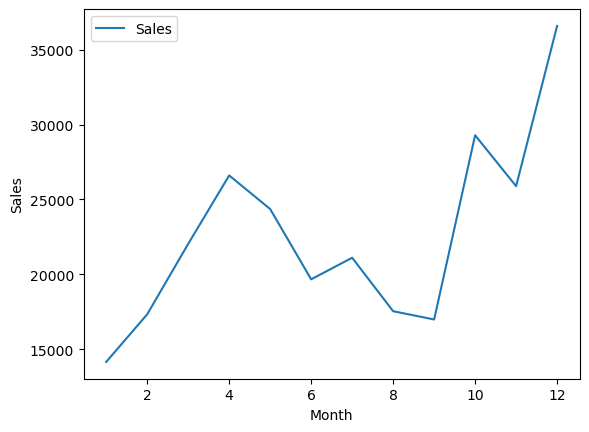

In [34]:
dfin = df_month.plot(y = 'Sales',ylabel = 'Sales')

In [35]:
df_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,10903.0,14151.0
2,13449,13449.0,17331.0
3,17005,17005.0,22033.0
4,20558,20558.0,26604.0
5,18667,18667.0,24361.0
6,15253,15253.0,19667.0
7,16072,16072.0,21108.0
8,13448,13448.0,17538.0
9,13109,13109.0,16985.0


#### 2 : best day 

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Day
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,19
1,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,7
2,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12
3,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12
4,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,30


In [38]:
df = df.drop(columns = 'index')

In [40]:
df['Day'] = df['Order Date'].str[3:5]

In [42]:
df['Day'] = pd.to_numeric(df['Day'])

In [48]:
df_day = df.groupby('Day').sum('Sales')
df_day

,Quantity Ordered,Price Each,Month,Sales
Day,,,,
1,6867,6867.0,42455,9039.0
2,6962,6962.0,43552,9018.0
3,6534,6534.0,40739,8494.0
4,6813,6813.0,42825,8797.0
5,6816,6816.0,42374,8944.0
6,6778,6778.0,43030,8590.0
7,6779,6779.0,42405,8805.0
8,6824,6824.0,42755,8918.0
9,6836,6836.0,42422,8802.0


In [46]:
df.groupby('Day').sum('Sales').sort_values('Sales')

,Quantity Ordered,Price Each,Month,Sales
Day,,,,
31,4018,4018.0,26663,5246.0
30,6320,6320.0,41703,8142.0
29,6423,6423.0,42424,8307.0
3,6534,6534.0,40739,8494.0
11,6760,6760.0,42228,8560.0
15,6798,6798.0,43099,8588.0
6,6778,6778.0,43030,8590.0
27,6831,6831.0,42910,8665.0
18,6846,6846.0,42908,8704.0


<Axes: xlabel='Day', ylabel='Sales'>

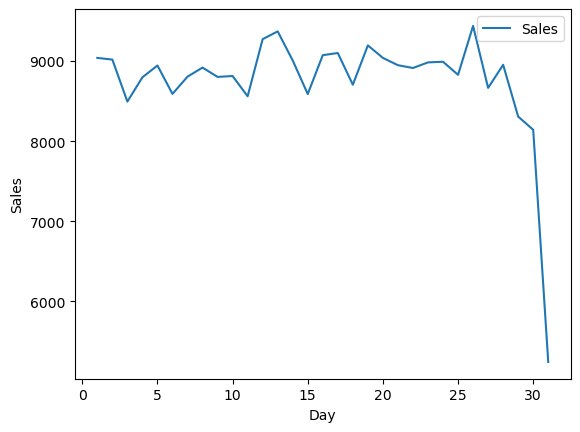

In [50]:
df_day.plot(y = 'Sales',ylabel = 'Sales')

#### 3 : best hour

In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Day,Hour
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,19,8
1,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,7,22
2,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14
3,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14
4,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,30,9


In [52]:
df['Hour'] = df['Order Date'].str[9:11]

In [57]:
df['Hour'] = pd.to_numeric(df['Hour'])

In [58]:
df_Hour = df.groupby('Hour').sum('Sales')

In [56]:
df.groupby('Hour').sum('Sales').sort_values('Sales')

,Quantity Ordered,Price Each,Month,Sales,Day
Hour,,,,,
4,937,937.0,6148,1149.0,13756
3,928,928.0,5904,1186.0,13430
2,1398,1398.0,8507,1816.0,19631
5,1493,1493.0,9301,2023.0,21347
1,2619,2619.0,16657,3301.0,37333
6,2810,2810.0,17539,3694.0,39824
0,4428,4428.0,27554,5866.0,62015
7,4556,4556.0,28850,5992.0,63111
8,7002,7002.0,43626,9030.0,98078


In [59]:
df_Hour

,Quantity Ordered,Price Each,Month,Sales,Day
Hour,,,,,
0,4428,4428.0,27554,5866.0,62015
1,2619,2619.0,16657,3301.0,37333
2,1398,1398.0,8507,1816.0,19631
3,928,928.0,5904,1186.0,13430
4,937,937.0,6148,1149.0,13756
5,1493,1493.0,9301,2023.0,21347
6,2810,2810.0,17539,3694.0,39824
7,4556,4556.0,28850,5992.0,63111
8,7002,7002.0,43626,9030.0,98078


<Axes: xlabel='Hour', ylabel='Sales'>

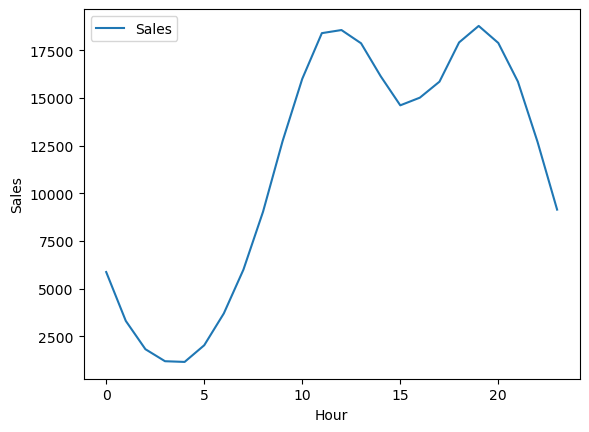

In [60]:
df_Hour.plot(y = 'Sales',ylabel = 'Sales')

#### 4 : best Product

In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Day,Hour
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,19,8
1,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,7,22
2,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14
3,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14
4,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,30,9


In [63]:
df_Product = df.groupby('Product').sum('Sales')

In [70]:
df_Product

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129,4129.0,4185.0
27in 4K Gaming Monitor,6244,6244.0,6272.0
27in FHD Monitor,7550,7550.0,7636.0
34in Ultrawide Monitor,6199,6199.0,6235.0
AA Batteries (4-pack),27635,27635.0,46525.0
AAA Batteries (4-pack),31017,31017.0,62207.0
Apple Airpods Headphones,15661,15661.0,15887.0
Bose SoundSport Headphones,13457,13457.0,13725.0
Flatscreen TV,4819,4819.0,4857.0


In [68]:
df_Product = df_Product.drop(columns = 'Month').drop(columns = 'Day').drop(columns = 'Hour')

In [73]:
df_Product.sort_values('Sales' , ascending = False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017,31017.0,62207.0
AA Batteries (4-pack),27635,27635.0,46525.0
USB-C Charging Cable,23975,23975.0,28537.0
Lightning Charging Cable,23217,23217.0,26571.0
Wired Headphones,20557,20557.0,24241.0
Apple Airpods Headphones,15661,15661.0,15887.0
Bose SoundSport Headphones,13457,13457.0,13725.0
27in FHD Monitor,7550,7550.0,7636.0
iPhone,6849,6849.0,6863.0


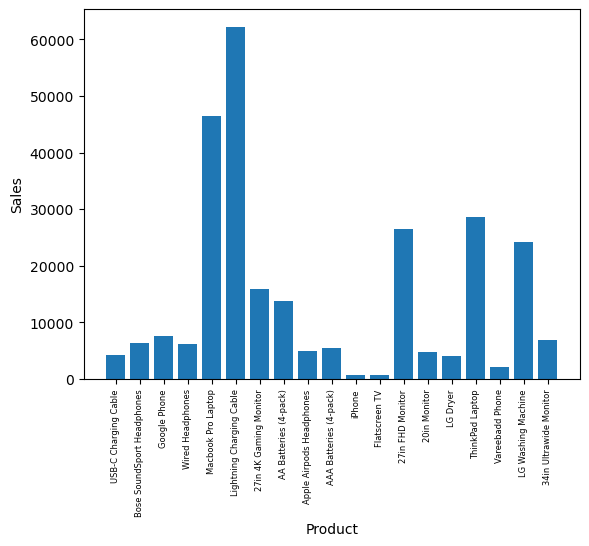

In [105]:
x1 = df['Product'].unique()
plt.bar(x1 , df_Product['Sales'])
plt.xticks(x1,rotation = 'vertical',size = 6)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

#### best city

In [113]:
def addr(v):
    return v.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: addr(x))

In [114]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Day,Hour,City
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,19,8,Dallas
1,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,7,22,Boston
2,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14,Los Angeles
3,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,12,14,Los Angeles
4,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,30,9,Los Angeles


In [117]:
df.groupby('City').sum('Sales').sort_values('Sales')

,Quantity Ordered,Price Each,Month,Sales,Day,Hour
City,,,,,,
Austin,11153,11153.0,69829,14469.0,156782,141946
Portland,14053,14053.0,87765,18349.0,197521,179632
Atlanta,16602,16602.0,104794,21184.0,234837,214264
Seattle,16553,16553.0,104941,21407.0,229552,213292
Dallas,16730,16730.0,104620,21964.0,234435,214390
Boston,22528,22528.0,141112,29600.0,312376,288225
New York City,27932,27932.0,175741,36106.0,392706,357696
Los Angeles,33289,33289.0,208325,43241.0,469607,427444
San Francisco,50239,50239.0,315520,65223.0,702669,643265


In [118]:
df_city = df.groupby('City').sum('Sales')

In [123]:
df_city

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,16602.0,21184.0
Austin,11153,11153.0,14469.0
Boston,22528,22528.0,29600.0
Dallas,16730,16730.0,21964.0
Los Angeles,33289,33289.0,43241.0
New York City,27932,27932.0,36106.0
Portland,14053,14053.0,18349.0
San Francisco,50239,50239.0,65223.0
Seattle,16553,16553.0,21407.0


In [122]:
df_city = df_city.drop(columns = 'Month')
df_city = df_city.drop(columns = 'Day')
df_city = df_city.drop(columns = 'Hour')

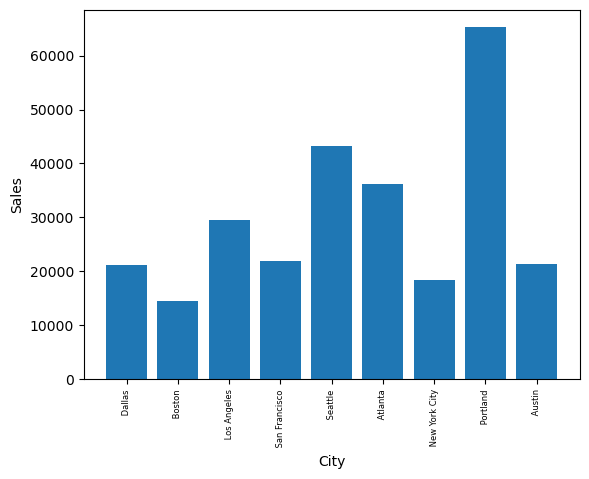

In [140]:
ci = df['City'].unique()
plt.bar(ci , df_city['Sales'])
plt.xticks(ci,rotation = 'vertical',size = 6)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()